--- Part I - Mathematical and Python Functions ---
Error loading housing_data.csv: [Errno 2] No such file or directory: 'housing_data.csv'
Error loading mushroom_data.csv: [Errno 2] No such file or directory: 'mushroom_data.csv'

4. --- Error Function Analysis ---


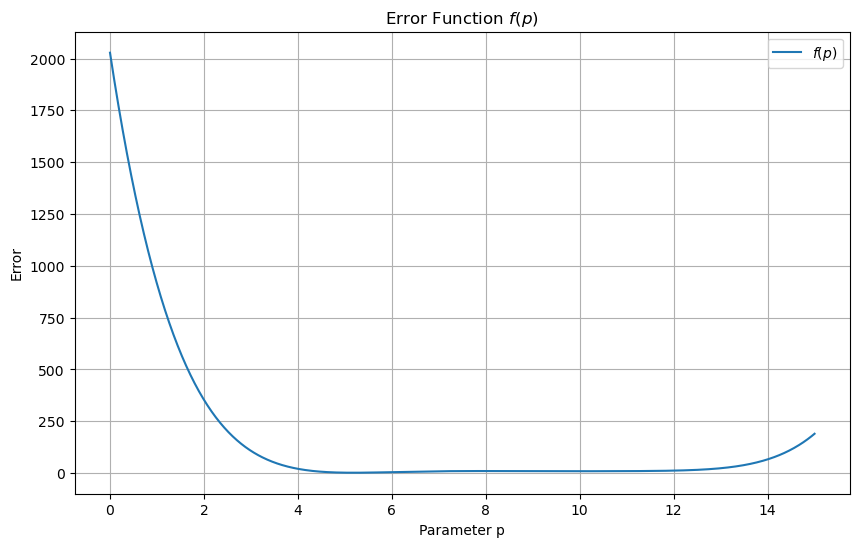

   Estimated value of p that minimizes the error: 5.1802
   Estimated minimum error: 1.7522

--- Part II - Scatterplots and Linear Regression ---
Error loading car_data.csv: [Errno 2] No such file or directory: 'car_data.csv'


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("--- Part I - Mathematical and Python Functions ---")

# 1. RMSE Calculation Function
def calculate_rmse(actual_values, predicted_values):
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)
    return np.sqrt(np.mean((predicted_values - actual_values) ** 2))

# 2. MAE Calculation Function
def calculate_mae(actual_values, predicted_values):
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)
    return np.mean(np.abs(predicted_values - actual_values))

# 3. Accuracy Calculation Function
def calculate_accuracy(actual_values, predicted_values):
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)
    correct_predictions = np.sum(actual_values == predicted_values)
    return (correct_predictions / len(actual_values)) * 100

# --- Load and Analyze Housing Data ---
try:
    housing_data = pd.read_csv("housing_data.csv")
    sale_price_actual = housing_data['sale price']
    sale_price_pred = housing_data['sale_price_pred']

    rmse_housing = calculate_rmse(sale_price_actual, sale_price_pred)
    mae_housing = calculate_mae(sale_price_actual, sale_price_pred)

    print(f"1. RMSE for housing_data.csv: {rmse_housing:.2f}")
    print(f"2. MAE for housing_data.csv: {mae_housing:.2f}")

except Exception as e:
    print(f"Error loading housing_data.csv: {e}")

# --- Load and Analyze Mushroom Data ---
try:
    mushroom_data = pd.read_csv("mushroom_data.csv")
    actual_mushrooms = mushroom_data['actual']
    predicted_mushrooms = mushroom_data['predicted']

    accuracy_mushroom = calculate_accuracy(actual_mushrooms, predicted_mushrooms)
    print(f"3. Accuracy for mushroom_data.csv: {accuracy_mushroom:.2f}%")

except Exception as e:
    print(f"Error loading mushroom_data.csv: {e}")

# --- Error Function Plot and Minimum Estimation ---
def error_function(p):
    return (0.005 * p**6 - 0.27 * p**5 + 5.998 * p**4 - 69.919 * p**3 +
            449.17 * p**2 - 1499.7 * p + 2028)

print("\n4. --- Error Function Analysis ---")
p_values = np.linspace(0, 15, 1000)
error_values = error_function(p_values)

plt.figure(figsize=(10, 6))
plt.plot(p_values, error_values, label='$f(p)$')
plt.title('Error Function $f(p)$')
plt.xlabel('Parameter p')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

min_error = np.min(error_values)
optimal_p = p_values[np.argmin(error_values)]

print(f"   Estimated value of p that minimizes the error: {optimal_p:.4f}")
print(f"   Estimated minimum error: {min_error:.4f}")

# --- Part II - Scatterplot and Regression with Car Data ---
print("\n--- Part II - Scatterplots and Linear Regression ---")
try:
    car_data = pd.read_csv("car_data.csv")
    weight = car_data['weight']
    highway_mpg = car_data['highway miles per gallon']

    # 1. Scatterplot
    plt.figure(figsize=(10, 6))
    plt.scatter(weight, highway_mpg, alpha=0.7)
    plt.title('1. Highway MPG vs. Vehicle Weight')
    plt.xlabel('Weight (pounds)')
    plt.ylabel('Highway Miles Per Gallon (MPG)')
    plt.grid(True)
    plt.show()

    # 2. General Trend
    print("2. As vehicle weight increases, highway MPG tends to decrease.")

    # 3. Expected Slope
    print("3. The slope is expected to be negative due to inverse relationship.")

    # 4. Slope Interpretation
    print("4. A slope of -0.05 means MPG decreases by 0.05 for every 1 lb increase in weight.")

    # 5. Plot Estimated Line
    estimated_slope = -0.015
    estimated_intercept = 70
    estimated_line = estimated_slope * weight + estimated_intercept

    plt.figure(figsize=(10, 6))
    plt.scatter(weight, highway_mpg, alpha=0.7, label='Data Points')
    plt.plot(weight, estimated_line, color='red',
             label=f'Estimated Line (Slope: {estimated_slope}, Intercept: {estimated_intercept})')
    plt.title('5. MPG vs. Weight with Estimated Line')
    plt.xlabel('Weight (pounds)')
    plt.ylabel('Highway MPG')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"   Recorded estimated slope: {estimated_slope}")
    print(f"   Recorded estimated y-intercept: {estimated_intercept}")

    # 6. Best-Fit Line Using Linear Regression
    X = weight.values.reshape(-1, 1)
    y = highway_mpg.values
    model = LinearRegression()
    model.fit(X, y)

    best_fit_slope = model.coef_[0]
    best_fit_intercept = model.intercept_
    print(f"\n6. Best-Fit Line (Scikit-learn):")
    print(f"   Slope: {best_fit_slope:.4f}")
    print(f"   Y-Intercept: {best_fit_intercept:.4f}")

    # Plot best-fit line
    plt.figure(figsize=(10, 6))
    plt.scatter(weight, highway_mpg, alpha=0.7, label='Data Points')
    plt.plot(weight, model.predict(X), color='green',
             label=f'Best-Fit Line (Slope: {best_fit_slope:.4f}, Intercept: {best_fit_intercept:.4f})')
    plt.title('MPG vs. Weight with Best-Fit Line')
    plt.xlabel('Weight (pounds)')
    plt.ylabel('Highway MPG')
    plt.grid(True)
    plt.legend()
    plt.show()

    # 7. RMSE Comparison
    rmse_manual = np.sqrt(mean_squared_error(highway_mpg, estimated_line))
    rmse_model = np.sqrt(mean_squared_error(highway_mpg, model.predict(X)))

    print("\n7. RMSE Comparison:")
    print(f"   Manual Line RMSE: {rmse_manual:.2f}")
    print(f"   Best-Fit Line RMSE: {rmse_model:.2f}")

    # 8. Predict MPG for 3200 lb car
    car_weight_3200 = 3200
    predicted_mpg_3200 = model.predict([[car_weight_3200]])[0]
    print(f"\n8. Predicted MPG for 3200 lb car: {predicted_mpg_3200:.2f} MPG")

except Exception as e:
    print(f"Error loading car_data.csv: {e}")
